✅ Dataset loaded successfully!
   Age  Sex  Cholesterol  BloodPressure  HeartRate  Smoking  Diabetes  \
0   63    0        343.6          173.9      132.1        0         1   
1   76    0        167.7           96.3      143.1        1         0   
2   53    1        308.4           90.9      171.1        1         1   
3   39    1        268.0           94.7      150.5        1         1   
4   67    1        246.0           98.0       84.5        0         0   

   ExerciseLevel  HeartDisease  
0              1             1  
1              2             1  
2              5             1  
3              1             1  
4              7             1  

2-WAY SPLIT RESULTS
Accuracy: 0.970
Precision: 0.968
Recall: 1.000
F1 Score: 0.984

3-WAY SPLIT RESULTS
Validation Accuracy: 0.973
Test Accuracy: 0.973


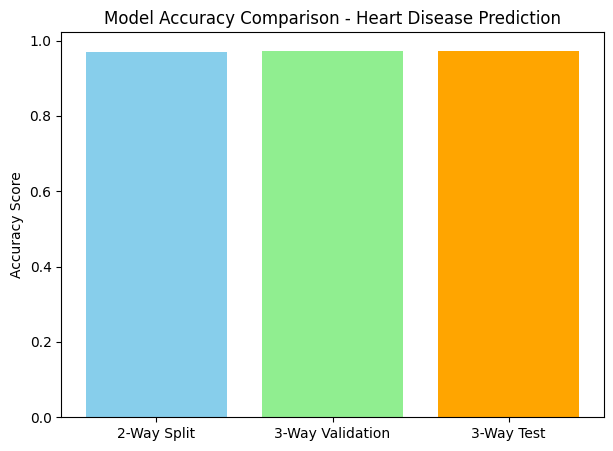

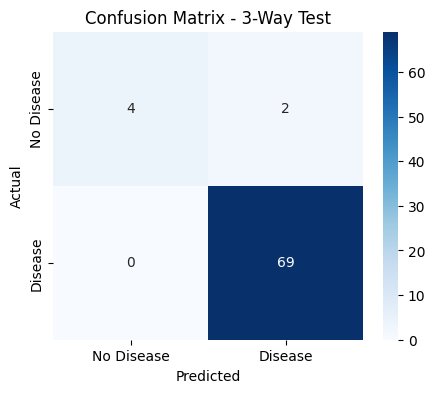


NEW USER HEART DISEASE PREDICTION
Result: ❤️ Likely to have Heart Disease


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart_disease_dataset.csv")
print("✅ Dataset loaded successfully!")
print(df.head())

X = df.drop(columns=["HeartDisease"]).values
y = df["HeartDisease"].values

scaler = StandardScaler()
model = LogisticRegression(max_iter=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc_2 = accuracy_score(y_test, y_pred)
prec_2 = precision_score(y_test, y_pred)
rec_2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

print("\n2-WAY SPLIT RESULTS")
print(f"Accuracy: {acc_2:.3f}")
print(f"Precision: {prec_2:.3f}")
print(f"Recall: {rec_2:.3f}")
print(f"F1 Score: {f1_2:.3f}")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

acc_val = accuracy_score(y_val, y_val_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("\n3-WAY SPLIT RESULTS")
print(f"Validation Accuracy: {acc_val:.3f}")
print(f"Test Accuracy: {acc_test:.3f}")

plt.figure(figsize=(7,5))
plt.bar(["2-Way Split", "3-Way Validation", "3-Way Test"],
        [acc_2, acc_val, acc_test],
        color=["skyblue", "lightgreen", "orange"])
plt.title("Model Accuracy Comparison - Heart Disease Prediction")
plt.ylabel("Accuracy Score")
plt.show()

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix - 3-Way Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nNEW USER HEART DISEASE PREDICTION")
new_user = [[55, 1, 280, 145, 88, 1, 0, 3]]
new_user_scaled = scaler.transform(new_user)
prediction = model.predict(new_user_scaled)

if prediction[0] == 1:
    print("Result: ❤️ Likely to have Heart Disease")
else:
    print("Result: 💚 Unlikely to have Heart Disease")
